In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Quality_Concrete- PS 1.csv to Quality_Concrete- PS 1.csv
User uploaded file "Quality_Concrete- PS 1.csv" with length 788964 bytes


In [ ]:
df = pd.read_csv('Quality_Concrete- PS 1.csv')
df.head()

,Unnamed: 0,Chloride,Label,Organic_Carbon,Solids,Sulphate,Turbidity,ph
0,0,1119.324168,1,178.253002,526.051381,305.391066,1956.909586,2.019602
1,1,1036.079757,1,121.985937,751.978355,202.951022,1816.186138,5.979678
2,2,1533.371242,1,100.844370,1940.216276,158.901826,1850.391669,3.647249
3,3,530.060453,1,169.685077,1667.346846,312.075730,677.841225,5.598852
4,4,1633.186960,1,148.456935,1401.681101,204.934673,416.156446,4.234521


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 1800x1800 with 0 Axes>

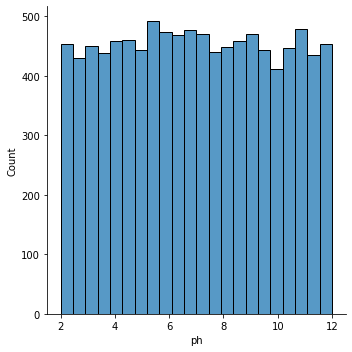

In [ ]:
plt.figure(figsize=(25, 25))
sns.displot(df['ph'])

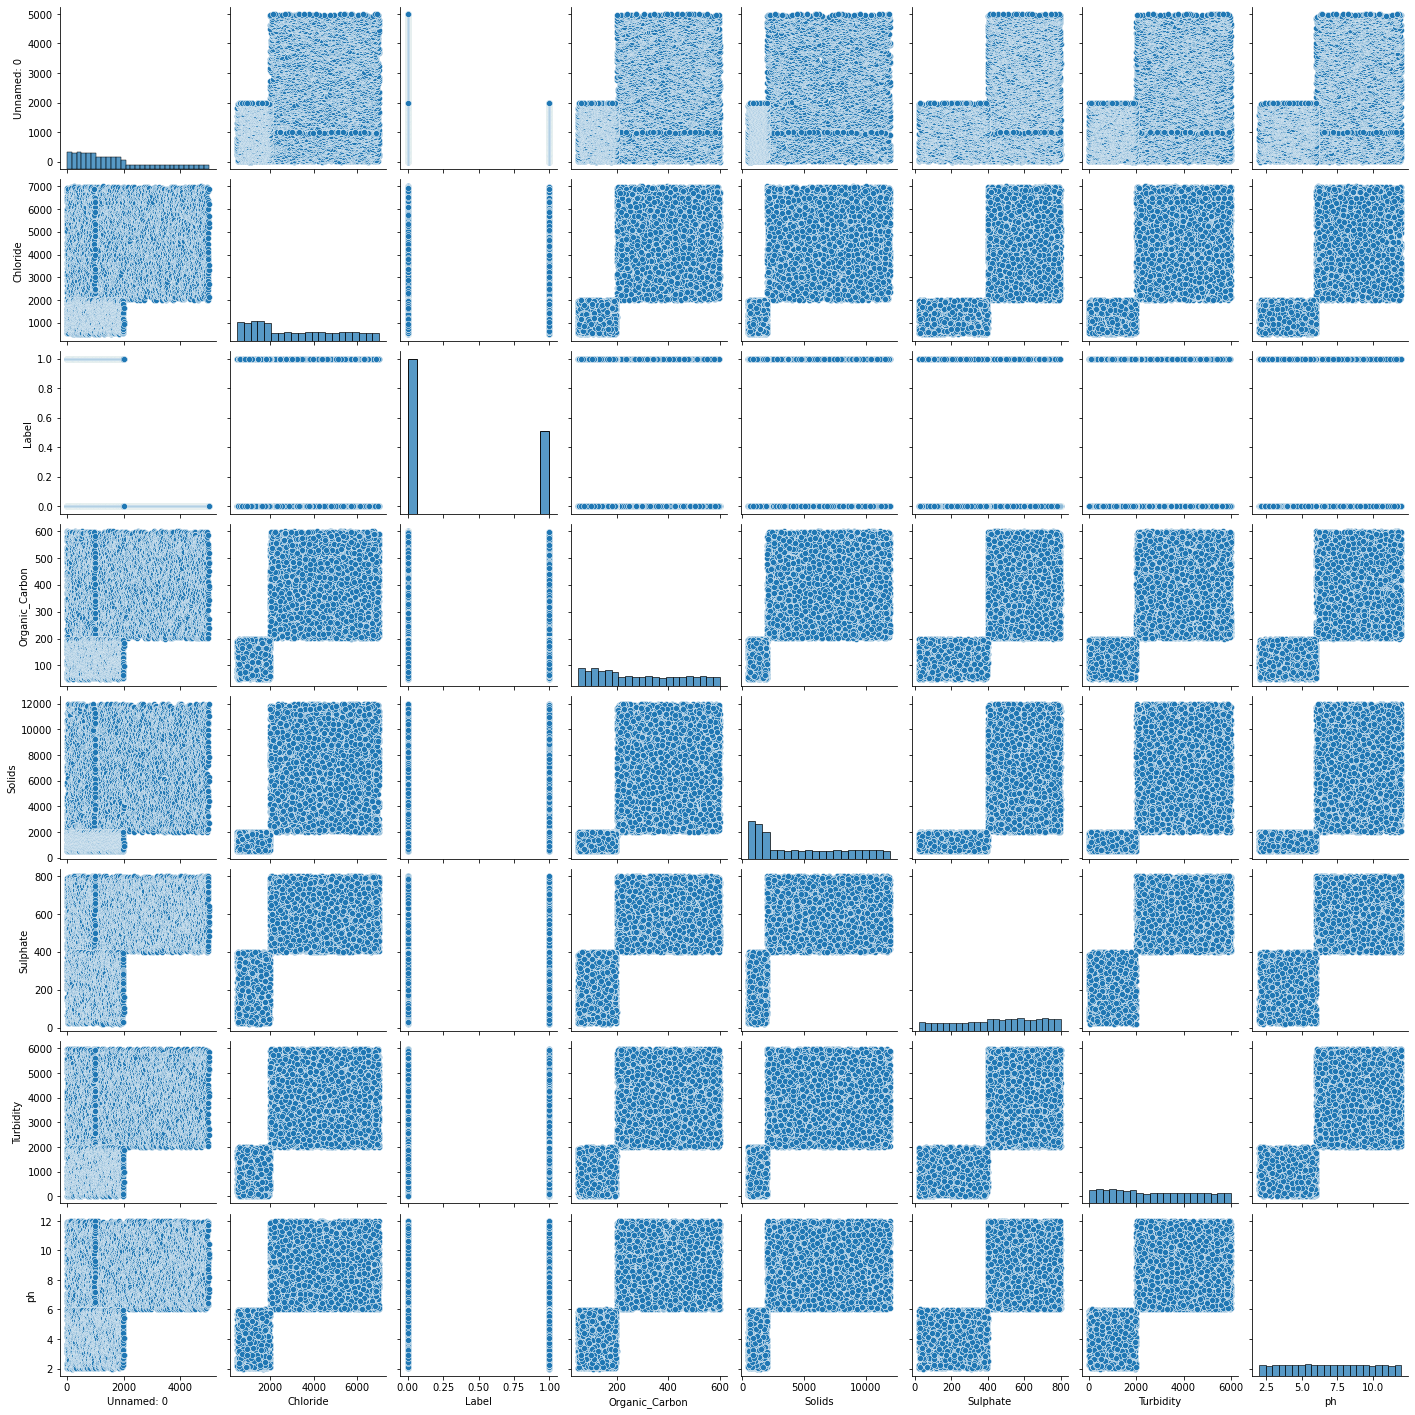

In [ ]:
sns.pairplot(data=df)

In [ ]:
df.keys()

Index(['Unnamed: 0', 'Chloride', 'Label', 'Organic_Carbon', 'Solids',
       'Sulphate', 'Turbidity', 'ph'],
      dtype='object')

<AxesSubplot:xlabel='Label', ylabel='ph'>

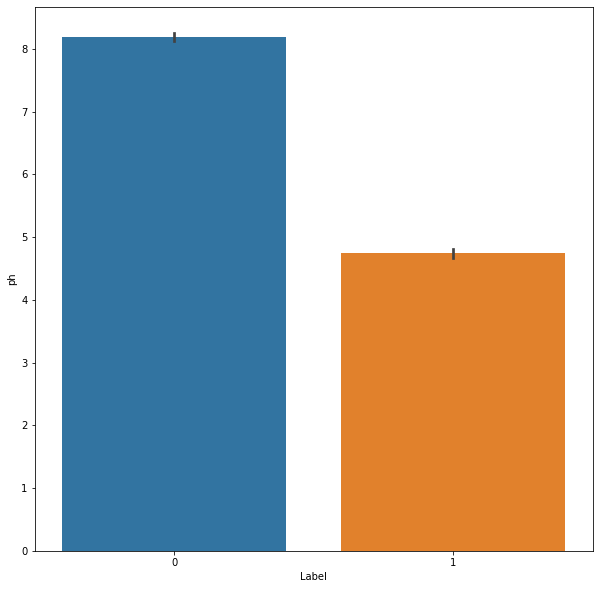

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(data=df, x='Label', y='ph')

<AxesSubplot:>

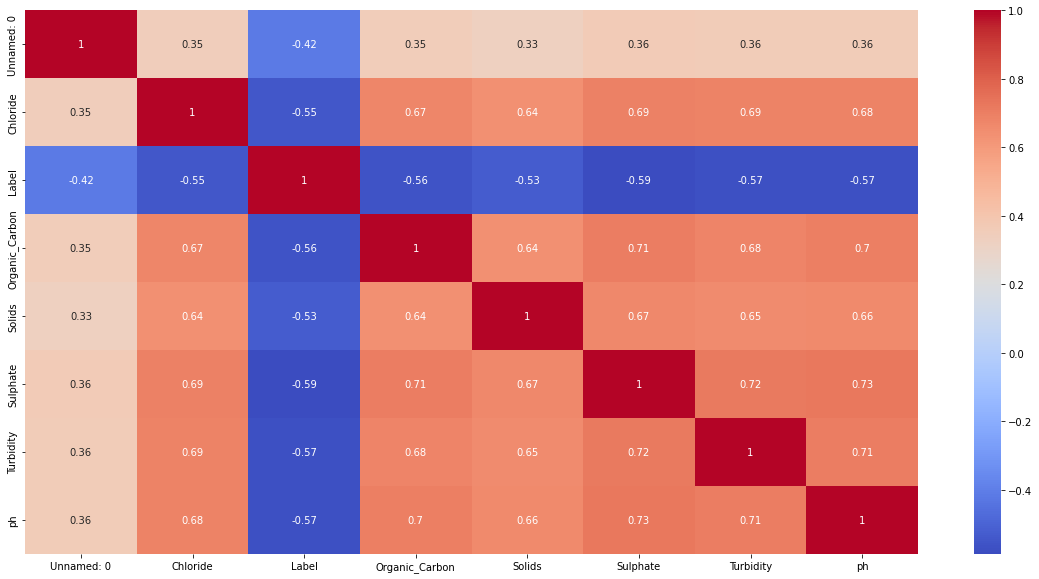

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),
           annot=True,
           cmap='coolwarm')

In [ ]:
df.isna().sum()

Unnamed: 0        0
Chloride          0
Label             0
Organic_Carbon    0
Solids            0
Sulphate          0
Turbidity         0
ph                0
dtype: int64

In [ ]:
del df['Unnamed: 0']

In [ ]:
df.tail()

,Chloride,Label,Organic_Carbon,Solids,Sulphate,Turbidity,ph
9995,1160.140252,1,62.559394,1830.670755,170.911606,948.376706,2.898108
9996,1810.432422,1,104.346350,1991.803437,282.877402,1964.359366,5.235614
9997,1039.441333,1,172.193162,919.904749,160.812509,980.138093,4.058639
9998,1637.732218,0,183.601604,1161.583133,83.375289,583.113548,5.399111
9999,927.936309,0,99.094721,880.554869,104.313935,1875.880143,2.930287


In [ ]:
X = df.drop('Label', axis=1)
Y = df['Label']

In [ ]:
# split into training and validation set
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)
len(X_train), len(X_val), len(y_train), len(y_val)

(8000, 2000, 8000, 2000)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix, classification_report

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier

In [ ]:
models = {"LogisticRegression" : LogisticRegression(),
        "RandomForestClassifier" : RandomForestClassifier(),
        "GradientBoostingClassifier" : GradientBoostingClassifier(),
        "SVM" : LinearSVC(),
        "XGB " : XGBClassifier()}

In [ ]:
def fit_and_score(X_train, X_val, y_train, y_val, models):
    
    np.random.seed(42)
    
    model_scores = {}
    
    for name, model in models.items():
        
        model.fit(X_train, y_train)
        
        model_scores[name] = model.score(X_val, y_val)
        
    return model_scores

In [ ]:
models = fit_and_score(X_train=X_train, X_val=X_val, y_train=y_train, y_val=y_val, models=models)
models

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


{'LogisticRegression': 0.858,
 'RandomForestClassifier': 0.7745,
 'GradientBoostingClassifier': 0.8535,
 'SVM': 0.3495,
 'XGB ': 0.814}

In [ ]:
{'LogisticRegression': 0.6280487804878049,
 'RandomForestClassifier': 0.6737804878048781,
 'GradientBoostingClassifier': 0.6707317073170732,
 'SVM': 0.6234756097560976,
 'XGB ': 0.6753048780487805}

{'LogisticRegression': 0.6280487804878049,
 'RandomForestClassifier': 0.6737804878048781,
 'GradientBoostingClassifier': 0.6707317073170732,
 'SVM': 0.6234756097560976,
 'XGB ': 0.6753048780487805}

In [ ]:
model_comparision = pd.DataFrame()
model_comparision['Model Name'] = models.keys()
model_comparision['Accuracy'] = models.values()
model_comparision

,Model Name,Accuracy
0,LogisticRegression,0.8580
1,RandomForestClassifier,0.7745
2,GradientBoostingClassifier,0.8535
3,SVM,0.3495
4,XGB,0.8140


In [ ]:
# XGB gave has good accuracy

np.random.seed(42)
ideal_model = XGBClassifier()
ideal_model.fit(X_train, y_train)
y_preds = ideal_model.predict(X_val)
y_preds

ideal_model.score(X_val, y_val)

0.814

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix


Accuracy : 81.40%
Precision : 0.729957805907173
Recall : 0.7424892703862661
F1  : 0.7361702127659575
----------------------------------------------------------------------------------------------------
                       Classification_Report             
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      1301
           1       0.73      0.74      0.74       699

    accuracy                           0.81      2000
   macro avg       0.80      0.80      0.80      2000
weighted avg       0.81      0.81      0.81      2000

----------------------------------------------------------------------------------------------------


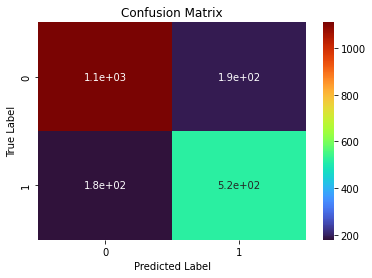

In [ ]:
print(f"Accuracy : {accuracy_score(y_val, y_preds)*100:.2f}%")
print(f"Precision : {precision_score(y_val, y_preds)}")
print(f"Recall : {recall_score(y_val, y_preds)}")
print(f"F1  : {f1_score(y_val, y_preds)}")
print("-"*100)
print("                       Classification_Report             ")
print(classification_report(y_val,y_preds))
print("-" * 100)
sns.heatmap(confusion_matrix(y_val, y_preds),
           annot=True,
           cmap='turbo')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label');